In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from cnn_model import cnn 
%matplotlib inline

#reload it on CPU
device = torch.device('cpu')
cnn.load_state_dict(torch.load('/Users/liuziwei/Desktop/new_model.pth', map_location=device))
cnn.eval()

ConvNet(
  (conv_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), paddi

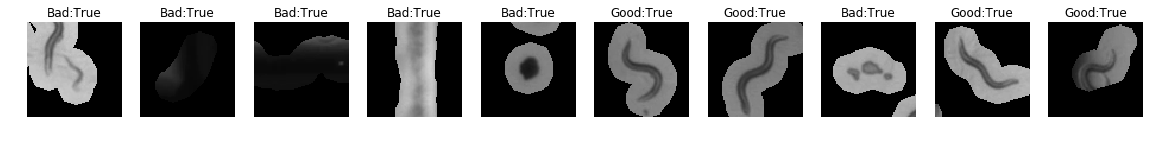

In [23]:
from skimage import color
from skimage import io

test_transforms=transforms. Compose([
        transforms.RandomVerticalFlip(p=0.4),
        transforms.RandomHorizontalFlip(p=0.4),
        transforms.ToTensor()])

testdata_dir = '/Users/liuziwei/Desktop/hydra_manually_annotated/test/img_divided'

def predict_image(image):  
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = cnn(input)
    index = output.data.cpu().numpy().argmax()
    return index

testdata = datasets.ImageFolder(testdata_dir, transform=test_transforms)
classes = testdata.classes
classes = {0:'Bad', 1 : 'Good'}  # Bad =0= non-worm+ aggregates  Good =1=valid+difficult worms

def get_random_images(num):
    indices = list(range(len(testdata)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(testdata, sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

to_pil = transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(num_output_channels=1)])
images, labels = get_random_images(10)
fig= plt.figure(figsize=(20,20))
for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index # whether it has made a right prediction(=True)
    sub.set_title(str(classes[index]) + ":" + str(res)) 
    plt.axis('off')
    plt.imshow(image)
plt.show()